# CodeRefinery pre-workshop survey

As part of the registration to a CodeRefinery workshop, participants are asked to fill in a survey. This notebook contains analysis of the survey results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

Registration time (with personal info removed) kept in `personal` folder, survey results under `survey`.

In [2]:
personal = "personal/"
typeform_survey = "survey/"
indico_survey = "indico_survey/"
years = [2016, 2017, 2018]

#### Import (anonymous) personal info

Collect all data into single dataframe `df_personal`

In [3]:
dfs = []
keys = []
for f in glob.glob(personal+'/20*/*_processed.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_personal = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
df_personal.head()

Unnamed: 0  Gender
2017-umea-oct_processed 0           0    Male
                        1           1  Female
                        2           2    Male
                        3           3    Male
                        4           4    Male

#### Import TypeForm survey results

Collect all data into single dataframe `df_survey`

In [4]:
df_survey_tf = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(typeform_survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey_tf = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
df_survey_tf.head()

What is the <strong>operating system</strong> that you will use during the course (on your laptop)?  \
2017-linkoeping-nov 0                                              Linux                                                    
                    1                                              Linux                                                    
                    2                                              Linux                                                    
                    3                                           Mac OS X                                                    
                    4                                              Linux                                                    

                      Other  \
2017-linkoeping-nov 0   NaN   
                    1   NaN   
                    2   NaN   
                    3   NaN   
                    4   NaN   

                      Which <strong>version</strong> of operating system are you using? If your operating system is Linux, which <strong>distribution</strong> are you using?  \
2017-linkoeping-nov 0                                          Fedora 25                                                                                                        
                    1                                   Ubuntu 16.04 LTS                                                                                                        
                    2                                         Linux mint                                                                                                        
                    3                                             mac os                                                                                                        
                    4                                               Arch                                                                                                        

                      I don't use version control and I don't know what it is  \
2017-linkoeping-nov 0                                                NaN        
                    1  I don't use version control and I don't know w...        
                    2                                                NaN        
                    3                                                NaN        
                    4                                                NaN        

                      I don't use version control but I know what it is  \
2017-linkoeping-nov 0                                               NaN   
                    1                                               NaN   
                    2                                               NaN   
                    3                                               NaN   
                    4                                               NaN   

                      I use version control, but I don't know which system  \
2017-linkoeping-nov 0                                                NaN     
                    1                                                NaN     
                    2                                                NaN     
                    3                                                NaN     
                    4                                                NaN     

                       Git Mercurial Subversion  CVS          ...           \
2017-linkoeping-nov 0  Git       NaN        NaN  NaN          ...            
                    1  NaN       NaN        NaN  NaN          ...            
                    2  Git       NaN        NaN  NaN          ...            
                    3  Git       NaN        NaN  NaN          ...            
                    4  Git       NaN        NaN  NaN          ...            

                       Software licensing  Documentation     Start Date (UTC)  \
2017-linkoeping-nov 0  Software licensing  Documentation  2017-1

#### Merging split columns

Some questions are split over two columns (one containing NaNs for a given workshop)

In [5]:
from difflib import SequenceMatcher

# function to compare similarity between two strings
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

# comparing column names

for n1 in range(len(df_survey_tf.columns)-1):
    for n2 in range(n1+1, len(df_survey_tf.columns)):
        col1 = df_survey_tf.columns[n1]
        col2 = df_survey_tf.columns[n2]
        similarity = similar(col1, col2)
        if similarity > 0.9:
            print("col1 = ", col1)
            print("col2 = ", col2)
            print("similarity = ", similarity)
            print("===========")

col1 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
col2 =  Are you using <strong>code coverage analysis</strong> in your programming project(s)?
similarity =  0.9882352941176471
col1 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
col2 =  Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
similarity =  0.991304347826087
col1 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
col2 =  Are you using an <strong>integrated development environment (IDE)</strong> for your programming project(s)?
similarity =  0.9906542056074766
col1 =  Please specify your main <strong>academic discipline</strong>.
col2 =  Please specify your main <strong>academic discipline</strong>.
similarity =  0.9838709677419355


These are the duplicate columns:

In [6]:
travis = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "Travis or Jenkins" in c]
codecov = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "code coverage analysis" in c]
ide = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "integrated development environment" in c]
discipline = [df_survey_tf.columns.get_loc(c) for c in df_survey_tf.columns if "academic discipline" in c]

dupl = {"travis":travis, "codecov":codecov, "ide":ide, "discipline":discipline}

Copy from second to first column if value is not NaN

In [7]:
df_survey_tf.iloc[:,dupl["travis"][0]].fillna(df_survey_tf.iloc[:,dupl["travis"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["codecov"][0]].fillna(df_survey_tf.iloc[:,dupl["codecov"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["ide"][0]].fillna(df_survey_tf.iloc[:,dupl["ide"][1]], inplace=True)
df_survey_tf.iloc[:,dupl["discipline"][0]].fillna(df_survey_tf.iloc[:,dupl["discipline"][1]], inplace=True)

Remove reduntant column after copying non-NaN values

In [8]:
rmlist = [x[1] for x in dupl.values()]
df_survey_tf.drop(df_survey_tf.columns[rmlist], axis=1, inplace=True)

#### Import Indico survey results

In [9]:
df_survey_indico = pd.DataFrame()
dfs = []
keys = []
for f in glob.glob(indico_survey+'/20*/*.csv'):
    dfs.append(pd.read_csv(f))
    key = f.replace("/"," ").split()[1:]
    keys.append("-".join(key).replace(".csv",""))

df_survey_indico = pd.concat(dfs, keys=keys, ignore_index=False, sort=False)
for i in df_survey_indico:
    # remove unnecessary string from index:
    df_survey_indico.rename(columns=lambda x: 
                       x.replace("Pre-workshop survey: ", ""), 
                       inplace=True)
df_survey_indico.head()


Submitter  Submitter Email  \
2018-aalto-dec 0        NaN              NaN   
               1        NaN              NaN   
               2        NaN              NaN   
               3        NaN              NaN   
               4        NaN              NaN   

                                   Submission Date  \
2018-aalto-dec 0  2018-10-22 09:22:23.226585+00:00   
               1  2018-10-22 13:57:25.460735+00:00   
               2  2018-10-24 12:29:11.513621+00:00   
               3  2018-11-06 11:00:05.242664+00:00   
               4  2018-11-06 11:11:38.111913+00:00   

                 What is the operating system that you will use during the course (on your laptop)?  \
2018-aalto-dec 0                                              macOS                                   
               1                                              macOS                                   
               2                                              macOS                                   
               3                                              macOS                                   
               4                                            Windows                                   

                 Which version of operating system are you using? If your operating system is Linux, which distribution are you using? This will help us to create more targeted installation instructions.  \
2018-aalto-dec 0                                                NaN                                                                                                                                           
               1                       High Sierra, Version 10.13.6                                                                                                                                           
               2                     mac os x 10.12.6 (High Sierra)                                                                                                                                           
               3                macOS High Sierra - Version 10.13.6                                                                                                                                           
               4                                         Windows 10                                                                                                                                           

                      Are you using version control? If yes, which?  \
2018-aalto-dec 0                                                Git   
               1  I don't use version control and I don't know w...   
               2                                                Git   
               3  I don't use version control and I don't know w...   
               4  I don't use version control but I know what it is   

                 Which programming languages are you using or will you use in your projects?  \
2018-aalto-dec 0                                          Matlab; R                            
               1                                          Matlab; R                            
               2                                          R; Python                            
               3                      Matlab; Python; C; C++; Julia                            
               4                                  Matlab; Python; C                            

                 Are you using automated testing in your programming project(s)?  \
2018-aalto-dec 0                     No and I don't know what it is                
               1                     No and I don't know what it is                
               2                                                Yes                
               3                     No and I don't know what it is                
               4                     No and I don't know what it is                

                 Are you using co

In [10]:
for i in df_survey_tf.columns:
    print(i)
print("==========")
for i in df_survey_indico.columns:
    print(i)


What is the <strong>operating system</strong> that you will use during the course (on your laptop)?
Other
Which <strong>version</strong> of operating system are you using? If your operating system is Linux, which <strong>distribution</strong> are you using?
I don't use version control and I don't know what it is
I don't use version control but I know what it is
I use version control, but I don't know which system
Git
Mercurial
Subversion
CVS
Perforce
Bazaar
Other.1
Matlab
R
Python
Perl
C
C++
Fortran 77
Fortran 90+
Julia
Haskell
Go
Other.2
Are you using <strong>automated testing</strong> in your programming project(s)?
Are you using <strong>code coverage analysis</strong> in your programming project(s)?
Are you employing <strong>code review</strong> in your programming project(s)?
Are you using the <strong>Travis or Jenkins</strong> continuous integration service in your programming project(s)?
No documentation
Comments in the source code
Doxygen
Wiki
RST/Sphinx
Read the Docs
MkDocs
PDF

#### Total number of registration and survey replies

In [11]:
print("number of registrations: ", len(df_personal))
print("number of survey responses: ", len(df_survey_tf)+len(df_survey_indico))

number of registrations:  407
number of survey responses:  479


## Preprocessing and merging of TypeForm and Indico data

Helper functions

In [12]:
def split_multiple_choices(series):
    "Function to split multiple answers in single field in pd.Series object, modifies in-place"
    for i in series.index:
        v = series[i]
        if ";" in i:
            s = i.split(";")
            for j in s:
                try:
                    series[j.strip()] += v
                except:
                    series[j.strip()] = v        
            series.drop(labels=i, inplace=True) 
    return

### Preprocess version control question

**First TypeForm data**

In [13]:
version_control = ["I don't use version control and I don't know what it is", 
                   "I don't use version control but I know what it is", 
                   "I use version control, but I don't know which system", 
                   "Git", "Mercurial", "Subversion", "CVS", 
                   "Perforce", "Bazaar"]

In [14]:
stats_vc_tf = df_survey_tf[version_control].notna().sum()
print(stats_vc_tf)

I don't use version control and I don't know what it is     56
I don't use version control but I know what it is          105
I use version control, but I don't know which system         2
Git                                                        253
Mercurial                                                   11
Subversion                                                  33
CVS                                                         13
Perforce                                                     2
Bazaar                                                       0
dtype: int64


**Then Indico data**

In [15]:
stats_vc_i = df_survey_indico["Are you using version control? If yes, which?"].value_counts()
# need to split up values where multiple answers given
split_multiple_choices(stats_vc_i)

stats_vc_i

Git                                                        42
I don't use version control but I know what it is          17
I don't use version control and I don't know what it is    14
Subversion                                                  6
Other                                                       1
CVS                                                         4
Name: Are you using version control? If yes, which?, dtype: int64

### Preprocess programming experience

**First TypeForm data**

In [16]:
experience='How would you describe your <strong>programming experience</strong>?'
stats_exp_tf = df_survey_tf[experience].value_counts()


print(stats_exp_tf)
print("total counts = ", sum(stats_exp_tf.values))


I have written many small codes and/or contributed to large complex software                 209
I have written my own simple programs                                                        136
Basic understanding and experience, I have looked through code and made minor adjustments     36
I am an expert                                                                                24
I have no programming experience                                                               2
Name: How would you describe your <strong>programming experience</strong>?, dtype: int64
total counts =  407


**Then Indico data**

In [17]:
experience='How would you describe your programming experience?'
stats_exp_i = df_survey_indico[experience].value_counts()


print(stats_exp_i)
print("total counts = ", sum(stats_exp_i.values))

I have written many small codes and/or contributed to large complex software                 37
I have written my own simple programs                                                        23
I am an expert                                                                                6
Basic understanding and experience, I have looked through code and made minor adjustments     5
I have no programming experience                                                              1
Name: How would you describe your programming experience?, dtype: int64
total counts =  72


### Preprocess operating system

**First TypeForm data**

In [18]:
os = 'What is the <strong>operating system</strong> that you will use during the course (on your laptop)?'
stats_os_tf = df_survey_tf[os].value_counts()
print(stats_os_tf)
print("total counts = ", sum(stats_os_tf.values))

Linux       157
Mac OS X    151
Windows      96
Name: What is the <strong>operating system</strong> that you will use during the course (on your laptop)?, dtype: int64
total counts =  404


**Then Indico data**

In [19]:
os = 'What is the operating system that you will use during the course (on your laptop)?'
stats_os_i = df_survey_indico[os].value_counts()
print(stats_os_i)
print("total counts = ", sum(stats_os_i.values))

macOS      30
Linux      24
Windows    18
Name: What is the operating system that you will use during the course (on your laptop)?, dtype: int64
total counts =  72


### Preprocess programming languages

**First Typeform data**

In [20]:
languages = sorted(['C', 'C++', 'Fortran 77', 'Fortran 90+', 'Matlab',
            'Python', 'Haskell', 'R', 'Perl', 'Julia', 'Go'])

In [21]:
df_languages = df_survey_tf[languages] 
stats_lang_tf = df_languages.notna().sum()
print(stats_lang_tf)
#print("total counts = ", sum(stats_lang_tf.values))

type(stats_lang_tf)

C               78
C++            105
Fortran 77      42
Fortran 90+     84
Go               3
Haskell          4
Julia           10
Matlab         150
Perl            31
Python         319
R              126
dtype: int64


pandas.core.series.Series

**Then Indico results**

In [22]:
lang = 'Which programming languages are you using or will you use in your projects?'
stats_lang_i = df_survey_indico[lang].value_counts()
split_multiple_choices(stats_lang_i)
print(stats_lang_i)
print("total counts = ", sum(stats_lang_i.values))

Python         57
Matlab         26
R              19
Perl            3
Other          13
C              20
C++            17
Fortran 77      5
Fortran 90+     8
Go              3
Julia           2
Haskell         1
Name: Which programming languages are you using or will you use in your projects?, dtype: int64
total counts =  174


### Preprocess documentation

**First Typeform data**

In [23]:
doc = sorted(["No documentation", "Comments in the source code", 
       "Doxygen", "Wiki", "RST/Sphinx", "Read the Docs", 
       "MkDocs", "PDF", "HMTL", "Markdown", "README files"])

In [24]:
df_doc = df_survey_tf[doc] 
stats_doc_tf = df_doc.notna().sum()
stats_doc_tf

Comments in the source code    329
Doxygen                         22
HMTL                            10
Markdown                        73
MkDocs                           1
No documentation                36
PDF                             38
README files                   156
RST/Sphinx                      16
Read the Docs                   24
Wiki                            29
dtype: int64

**Then Indico data**

In [25]:
doc = 'How do you document your code?'
stats_doc_i = df_survey_indico[doc].value_counts()
split_multiple_choices(stats_doc_i)
print(stats_doc_i)
print("total counts = ", sum(stats_doc_i.values))

Comments in the source code    57
Other                           5
Doxygen                         4
No documentation                2
Markdown                       12
RST/Sphinx                      1
README files                   18
Wiki                            5
readthedocs.org                 1
PDF                             3
HMTL                            1
Name: How do you document your code?, dtype: int64
total counts =  109


### Preprocess scientific disciplines

**First Typeform data**

In [26]:
discipline='Please specify your main\xa0<strong>academic discipline</strong>.'
stats_disc_tf = df_survey_tf[discipline].value_counts()

# merge all medicine and health disciplines
stats_disc_tf["Health and Medicine"] = 0.0
medicine_health = ["Health", "Medicine"]
for i in stats_disc_tf.index:
    if any(s in i for s in medicine_health if not i=="Health and Medicine"):
        stats_disc_tf["Health and Medicine"] += stats_disc_tf[i]
        stats_disc_tf.drop(labels=i, inplace=True)

# merge all engineering disciplines
stats_disc_tf["Engineering Sciences"] = 0.0
for i in stats_disc_tf.index:
    if "Engineering" in i and not i=="Engineering Sciences":
        stats_disc_tf["Engineering Sciences"] += stats_disc_tf[i]
        stats_disc_tf.drop(labels=i, inplace=True)

print(stats_disc_tf)
print("total counts = ", sum(stats_disc_tf.values))

Computer and Information Sciences           93.0
Physical Sciences                           90.0
Biological Sciences                         51.0
Chemical Sciences                           33.0
Earth and Related Environmental Sciences    27.0
Mathematics                                 15.0
Medical Biotechnology                        9.0
Other                                        6.0
Economics and Business                       4.0
Languages and Literature                     3.0
Psychology                                   3.0
Sociology                                    2.0
Other Natural Sciences                       2.0
Nano-technology                              2.0
Political Science                            1.0
Social and Economic Geography                1.0
Educational Sciences                         1.0
History and Archaeology                      1.0
Health and Medicine                         19.0
Engineering Sciences                        44.0
Name: Please specify

**Then Indico data**

In [27]:
discipline='Please specify your main academic discipline. Please take the entry which is closest to your main field of study/work.'
stats_disc_i = df_survey_indico[discipline].value_counts()

# merge all medicine and health disciplines
stats_disc_i["Health and Medicine"] = 0.0
medicine_health = ["Health", "Medicine"]
for i in stats_disc_i.index:
    if any(s in i for s in medicine_health if not i=="Health and Medicine"):
        stats_disc_i["Health and Medicine"] += stats_disc_i[i]
        stats_disc_i.drop(labels=i, inplace=True)

# merge all engineering disciplines
stats_disc_i["Engineering Sciences"] = 0.0
for i in stats_disc_i.index:
    if "Engineering" in i and not i=="Engineering Sciences":
        stats_disc_i["Engineering Sciences"] += stats_disc_i[i]
        stats_disc_i.drop(labels=i, inplace=True)

print(stats_disc_i)
print("total counts = ", sum(stats_disc_i.values))

Physical Sciences                           27.0
Biological Sciences                         12.0
Computer and Information Sciences           10.0
Earth and Related Environmental Sciences     5.0
Other Natural Sciences                       2.0
Chemical Sciences                            2.0
Philosophy, Ethics and Religion              1.0
Nano-technology                              1.0
Mathematics                                  1.0
Agriculture, Forestry and Fisheries          1.0
Health and Medicine                          1.0
Engineering Sciences                         9.0
Name: Please specify your main academic discipline. Please take the entry which is closest to your main field of study/work., dtype: float64
total counts =  72.0


### Plot styles

In [28]:
xsize = 10
ysize = 10
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Gender

Male                 286
Female               110
Prefer not to say     11
Name: Gender, dtype: int64
total counts =  407


/Users/ktw/anaconda2/envs/juplab/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


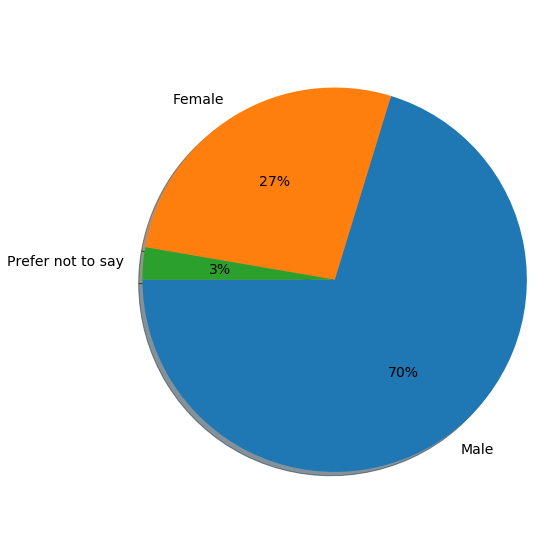

In [29]:
counts = df_personal["Gender"].value_counts()
print(counts)
print("total counts = ", sum(counts.values))
values = counts.values
labels = counts.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(counts.values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/gender.png")


### Operating system

**Add Typeform and Indico data**

In [30]:
stats_os = stats_os_tf.add(stats_os_i, fill_value=0.0)
stats_os["Mac OS X"] += stats_os["macOS"]
stats_os.drop(labels = "macOS", inplace=True)
stats_os

Linux       181.0
Mac OS X    181.0
Windows     114.0
dtype: float64

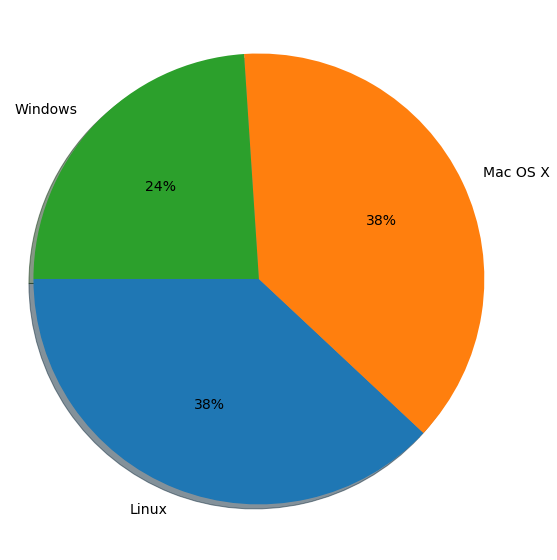

In [31]:
values = stats_os.values
labels = stats_os.index
fig1, ax1 = plt.subplots(figsize=(xsize-2,ysize-2))
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/operatingsystems.png")

### Programming experience

**Sum up values from TypeForm and Indico surveys**

In [32]:
stats_experience = stats_exp_i.add(stats_exp_tf, fill_value=0.0)
stats_experience

Basic understanding and experience, I have looked through code and made minor adjustments     41
I am an expert                                                                                30
I have no programming experience                                                               3
I have written many small codes and/or contributed to large complex software                 246
I have written my own simple programs                                                        159
dtype: int64

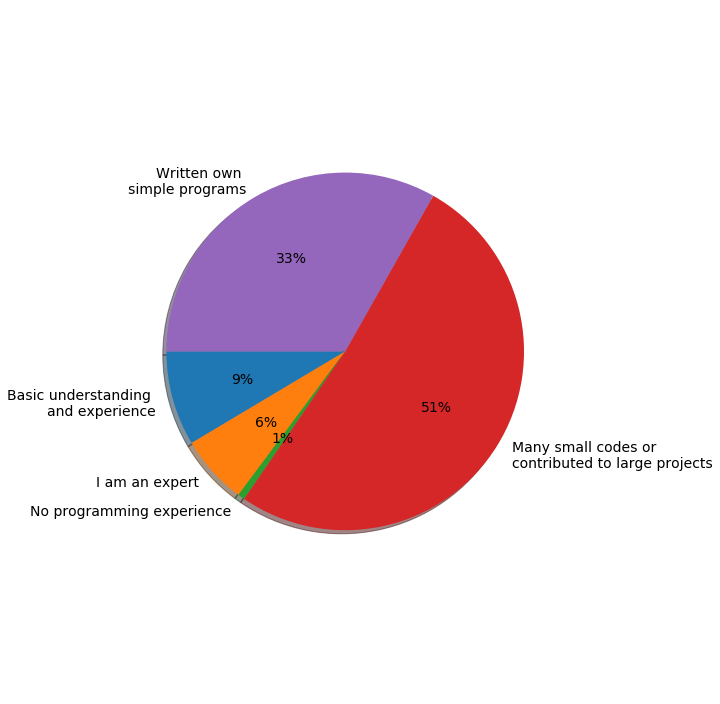

In [33]:
plt.rc('font', **font)

# renaming for less cluttering
stats_experience.rename({"I have written many small codes and/or contributed to large complex software": 
                   "Many small codes or \ncontributed to large projects"}, inplace=True)
stats_experience.rename({"I have written my own simple programs": 
                   "Written own \nsimple programs"}, inplace=True)
stats_experience.rename({"Basic understanding and experience, I have looked through code and made minor adjustments": 
                   "Basic understanding \nand experience"}, inplace=True)
stats_experience.rename({"I have no programming experience":
                   "No programming experience"}, inplace=True)

#counts.drop(labels="No programming experience", inplace=True)
values = stats_experience.values
labels = stats_experience.index
fig1, ax1 = plt.subplots(figsize=(xsize,ysize))
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/programming-experience.png")



### Experience with version control

**Sum up values from TypeForm and Indico surveys**

In [34]:
stats_vc = stats_vc_i.add(stats_vc_tf, fill_value=0.0)

Bazaar                                      0.0
CVS                                        17.0
Git                                       295.0
Don't use VCS, \ndon't know what it is     70.0
Don't use VCS, \nbut know what it is      122.0
Use VCS, but don't know which               2.0
Mercurial                                  11.0
Other                                       1.0
Perforce                                    2.0
Subversion                                 39.0
dtype: float64
total counts =  559.0


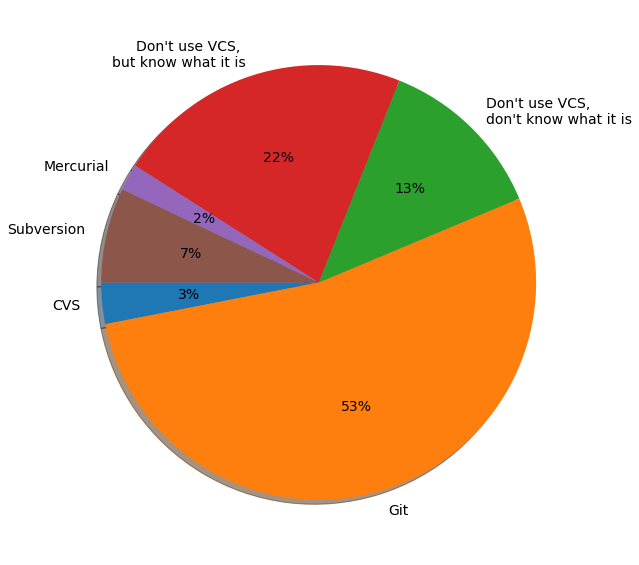

In [35]:
# renaming for less cluttering
stats_vc.rename({"I don't use version control and I don't know what it is": 
                   "Don't use VCS, \ndon't know what it is"}, inplace=True)
stats_vc.rename({"I don't use version control but I know what it is": 
                   "Don't use VCS, \nbut know what it is"}, inplace=True)
stats_vc.rename({"I use version control, but I don't know which system": 
                   "Use VCS, but don't know which"}, inplace=True)

print(stats_vc)
print("total counts = ", sum(stats_vc.values))
# dropping answers below 1%
stats_vc.drop(labels="Use VCS, but don't know which", inplace=True)
stats_vc.drop(labels="Perforce", inplace=True)
stats_vc.drop(labels="Bazaar", inplace=True)
stats_vc.drop(labels="Other", inplace=True)


plt.figure(figsize=(xsize,ysize))
stats_vc.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/version-control.png")
plt.show()


### Which language do you write in?

**Add up Typeform and Indico data**

In [36]:
stats_lang = stats_lang_tf.add(stats_lang_i, fill_value=0.0)
stats_lang

C               98.0
C++            122.0
Fortran 77      47.0
Fortran 90+     92.0
Go               6.0
Haskell          5.0
Julia           12.0
Matlab         176.0
Other           13.0
Perl            34.0
Python         376.0
R              145.0
dtype: float64

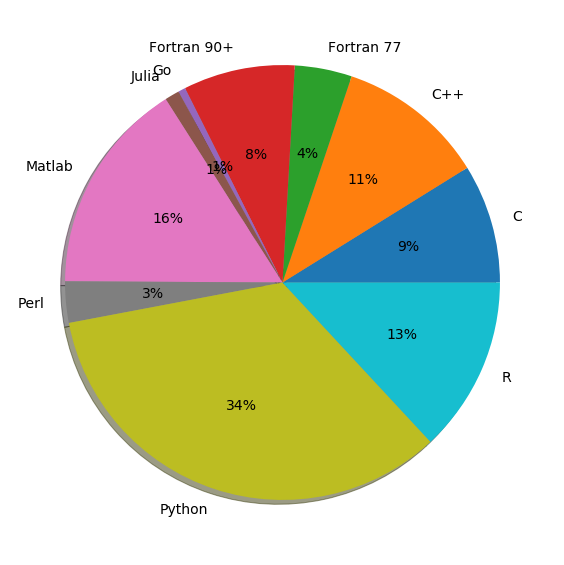

In [37]:

# dropping answers below 1%
stats_lang.drop(labels="Haskell", inplace=True)
stats_lang.drop(labels="Other", inplace=True)

plt.figure(figsize=(xsize,ysize))
stats_lang.plot.pie(autopct='%1.0f%%',
        shadow=True, startangle=0)
plt.ylabel("")
plt.savefig("img/languages.png")
plt.show()


### Documentation

**Add up Typeform and Indico data**

In [38]:
stats_doc = stats_doc_tf.add(stats_doc_i, fill_value=0.0)
stats_doc

Comments in the source code    386.0
Doxygen                         26.0
HMTL                            11.0
Markdown                        85.0
MkDocs                           1.0
No documentation                38.0
Other                            5.0
PDF                             41.0
README files                   174.0
RST/Sphinx                      17.0
Read the Docs                   24.0
Wiki                            34.0
readthedocs.org                  1.0
dtype: float64

Comments in the source code    386.0
Doxygen                         26.0
HMTL                            11.0
Markdown                        85.0
MkDocs                           1.0
No documentation                38.0
Other                            5.0
PDF                             41.0
README files                   174.0
RST/Sphinx                      17.0
Read the Docs                   24.0
Wiki                            34.0
readthedocs.org                  1.0
dtype: float64
total counts =  843.0


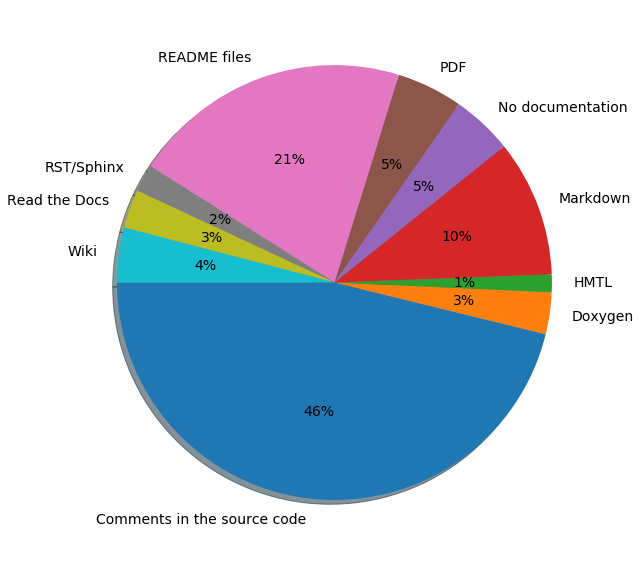

In [39]:
print(stats_doc)
print("total counts = ", sum(stats_doc.values))

# dropping answers below 1%
stats_doc.drop(labels="MkDocs", inplace=True)
stats_doc.drop(labels="readthedocs.org", inplace=True)
stats_doc.drop(labels="Other", inplace=True)

plt.figure(figsize=(xsize,ysize))
stats_doc.plot.pie(autopct='%1.0f%%', shadow=True, startangle=180)
plt.ylabel("")
plt.savefig("img/documentation.png")
plt.show()

### Scientific disciplines

In [40]:
stats_disciplines = stats_disc_tf.add(stats_disc_i, fill_value=0.0)
stats_disciplines

Agriculture, Forestry and Fisheries           1.0
Biological Sciences                          63.0
Chemical Sciences                            35.0
Computer and Information Sciences           103.0
Earth and Related Environmental Sciences     32.0
Economics and Business                        4.0
Educational Sciences                          1.0
Engineering Sciences                         53.0
Health and Medicine                          20.0
History and Archaeology                       1.0
Languages and Literature                      3.0
Mathematics                                  16.0
Medical Biotechnology                         9.0
Nano-technology                               3.0
Other                                         6.0
Other Natural Sciences                        4.0
Philosophy, Ethics and Religion               1.0
Physical Sciences                           117.0
Political Science                             1.0
Psychology                                    3.0


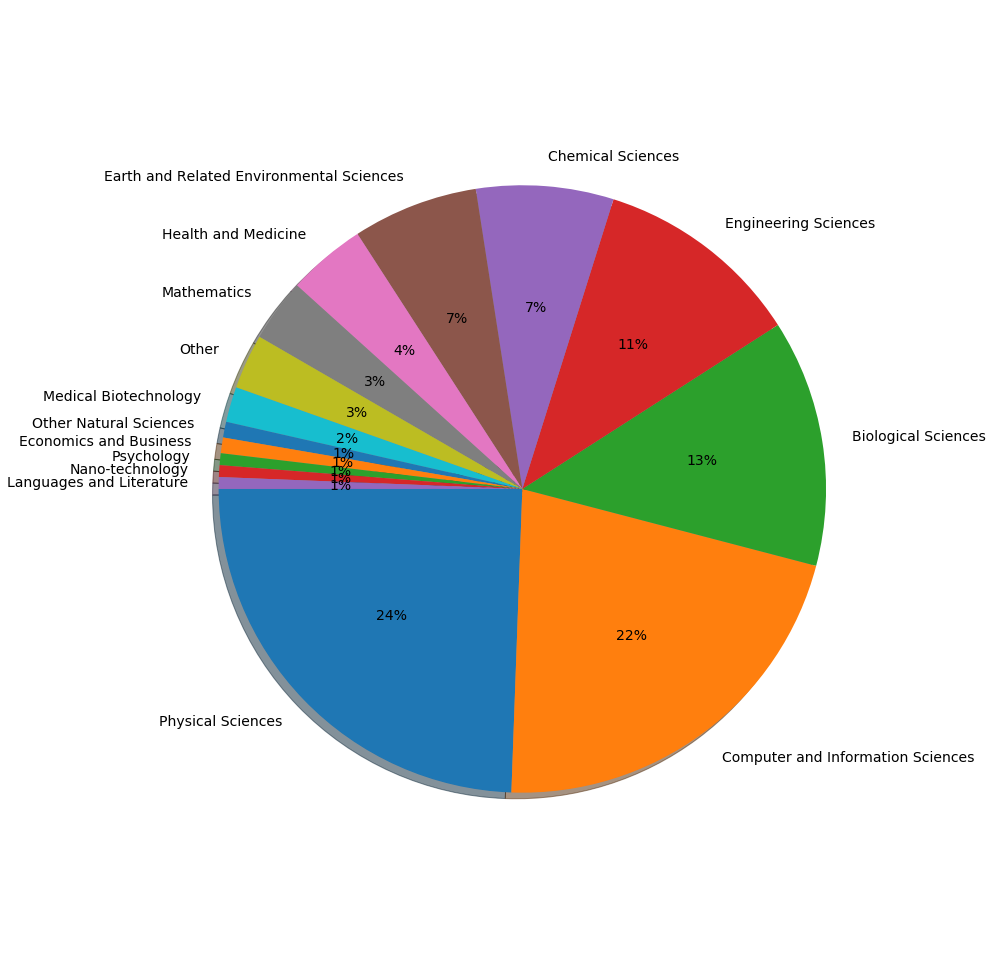

In [41]:
plt.rc('font', **font)

if not "Other" in stats_disciplines.index:
    stats_disciplines["Other"] = 0.0
for i in stats_disciplines.index:
    if stats_disciplines[i] < 3.0:
        stats_disciplines["Other"] += stats_disciplines[i]
        stats_disciplines.drop(labels=i, inplace=True)

stats_disciplines.sort_values(ascending=False, inplace=True)


values = stats_disciplines.values
labels = stats_disciplines.index
fig1, ax1 = plt.subplots(figsize=(14,14))
ax1.pie(values, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.figure.tight_layout()
plt.savefig("img/scientific-discipline.png")
